**0) INTRODUCTION**

The project explores the application of machine learning (ML) techniques to predict soybean harvesting volumes and soybean-based biofuel production using historical data spanning from 1948 to 2024. The study leverages datasets from governmental agencies, financial markets, and climate records to build and evaluate predictive models, providing actionable insights for stakeholders in agriculture and renewable energy sectors.

*Key Objectives:*

- **Develop ML Models**: Implement and compare multiple regression models, including Linear Regression, Random Forest (RF), Bayesian Regression, K-Nearest Neighbors (KNN), and Artificial Neural Networks (ANNs), to forecast soybean yields and biofuel production.

- **Identify Key Drivers**: Analyze feature importance to understand the economic, environmental, and geopolitical factors influencing soybean and biofuel outputs.

- **Provide Business Insights**: Offer recommendations for farmers, agribusinesses, biofuel producers, policymakers, and technology providers based on model performance and findings.

- **Enhance Predictive Accuracy**: Explore data preprocessing, feature selection, and hyperparameter tuning to optimize model performance.

_______________________________________
**1) DATA VISUALISATION & PREPROCESSING**

In [ ]:
# Importiing standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno

In [ ]:
# Preliminary configuration
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

In [ ]:
# Load the dataset
file_path = 'SOYBEAN PRODUCTION FULL DATA.xlsx'
try:
    df = pd.read_excel(file_path,index_col='Year')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("File not found. Please check the file path.")
    exit()

Dataset loaded successfully!


In [27]:
df.head(5)

,Value Produced (usd),Acres Planted,Acres Harvested,Commodities Market price (yearly average),Food Expenditure (millions),Food Imports (M dollars),Food Imports (1000 metric tonns)),Nitrogenous Fertilizer Manufacturing (PPI),Gasoline average price,B99/B100 avg price,B20 avg price,Average of Diesel,Soybean oil US production,Soybean oil US Imports,Soybean oil US Total supply,US Soybean oil consumption as biofuel,US Soybean oil consumption other than biofuel,Share of soybean oil used for biofuel,Average of sol_rad,Average of avg_rel_hum,Average of max_rel_hum,Average of min_air_temp,Average of max_air_temp
Year,,,,,,,,,,,,,,,,,,,,,,,
1948,184336000.0,3502000.0,3354000.0,27.0,15858.337505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1949,183561000.0,3467000.0,3287000.0,24.0,16026.090765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950,238383000.0,4108000.0,3989000.0,24.0,16193.844025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951,263538000.0,3841000.0,3731000.0,26.0,16361.597285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,247932000.0,3830000.0,3716000.0,25.0,16529.350545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Initial data exploration
print("\n=== Dataset Overview ===")
print(f"Shape: {df.shape} (rows, columns)")
print("\nData types:")
print(df.dtypes)
print("\nSummary statistics:")
print(df.describe(include='all'))


=== Dataset Overview ===
Shape: (77, 23) (rows, columns)

Data types:
Value Produced (usd)                             float64
Acres Planted                                    float64
Acres Harvested                                  float64
Commodities Market price (yearly average)        float64
Food Expenditure (millions)                      float64
Food Imports (M dollars)                         float64
Food Imports (1000 metric tonns))                float64
Nitrogenous Fertilizer Manufacturing (PPI)       float64
Gasoline average price                           float64
B99/B100 avg price                               float64
B20 avg price                                    float64
Average of Diesel                                float64
Soybean oil US production                        float64
Soybean oil US Imports                           float64
Soybean oil US Total supply                      float64
US Soybean oil consumption as biofuel            float64
US Soybean oil co

We can see that all of the data is numerical, thus elimianting any need to pursue one-hot encoding or similar processes to convert the data.

*Missing Values Analysis*

In [ ]:
print("\n=== Missing Values Analysis ===")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percent})
print(missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage (%)', ascending=False))


=== Missing Values Analysis ===
                                               Missing Values  Percentage (%)
Food Imports (M dollars)                                   51       66.233766
Soybean oil US production                                  51       66.233766
Share of soybean oil used for biofuel                      51       66.233766
US Soybean oil consumption other than biofuel              51       66.233766
US Soybean oil consumption as biofuel                      51       66.233766
Food Imports (1000 metric tonns))                          51       66.233766
Soybean oil US Imports                                     51       66.233766
Soybean oil US Total supply                                51       66.233766
Average of Diesel                                          51       66.233766
B20 avg price                                              51       66.233766
B99/B100 avg price                                         51       66.233766
Gasoline average price         

The dataset has an elevated number of missing values due to each feature belonging to a different time range. Although this action will singifcantly reduce the scale of our dataset, it will be necessarz to remove any rows with missing values.

<Figure size 1200x600 with 0 Axes>

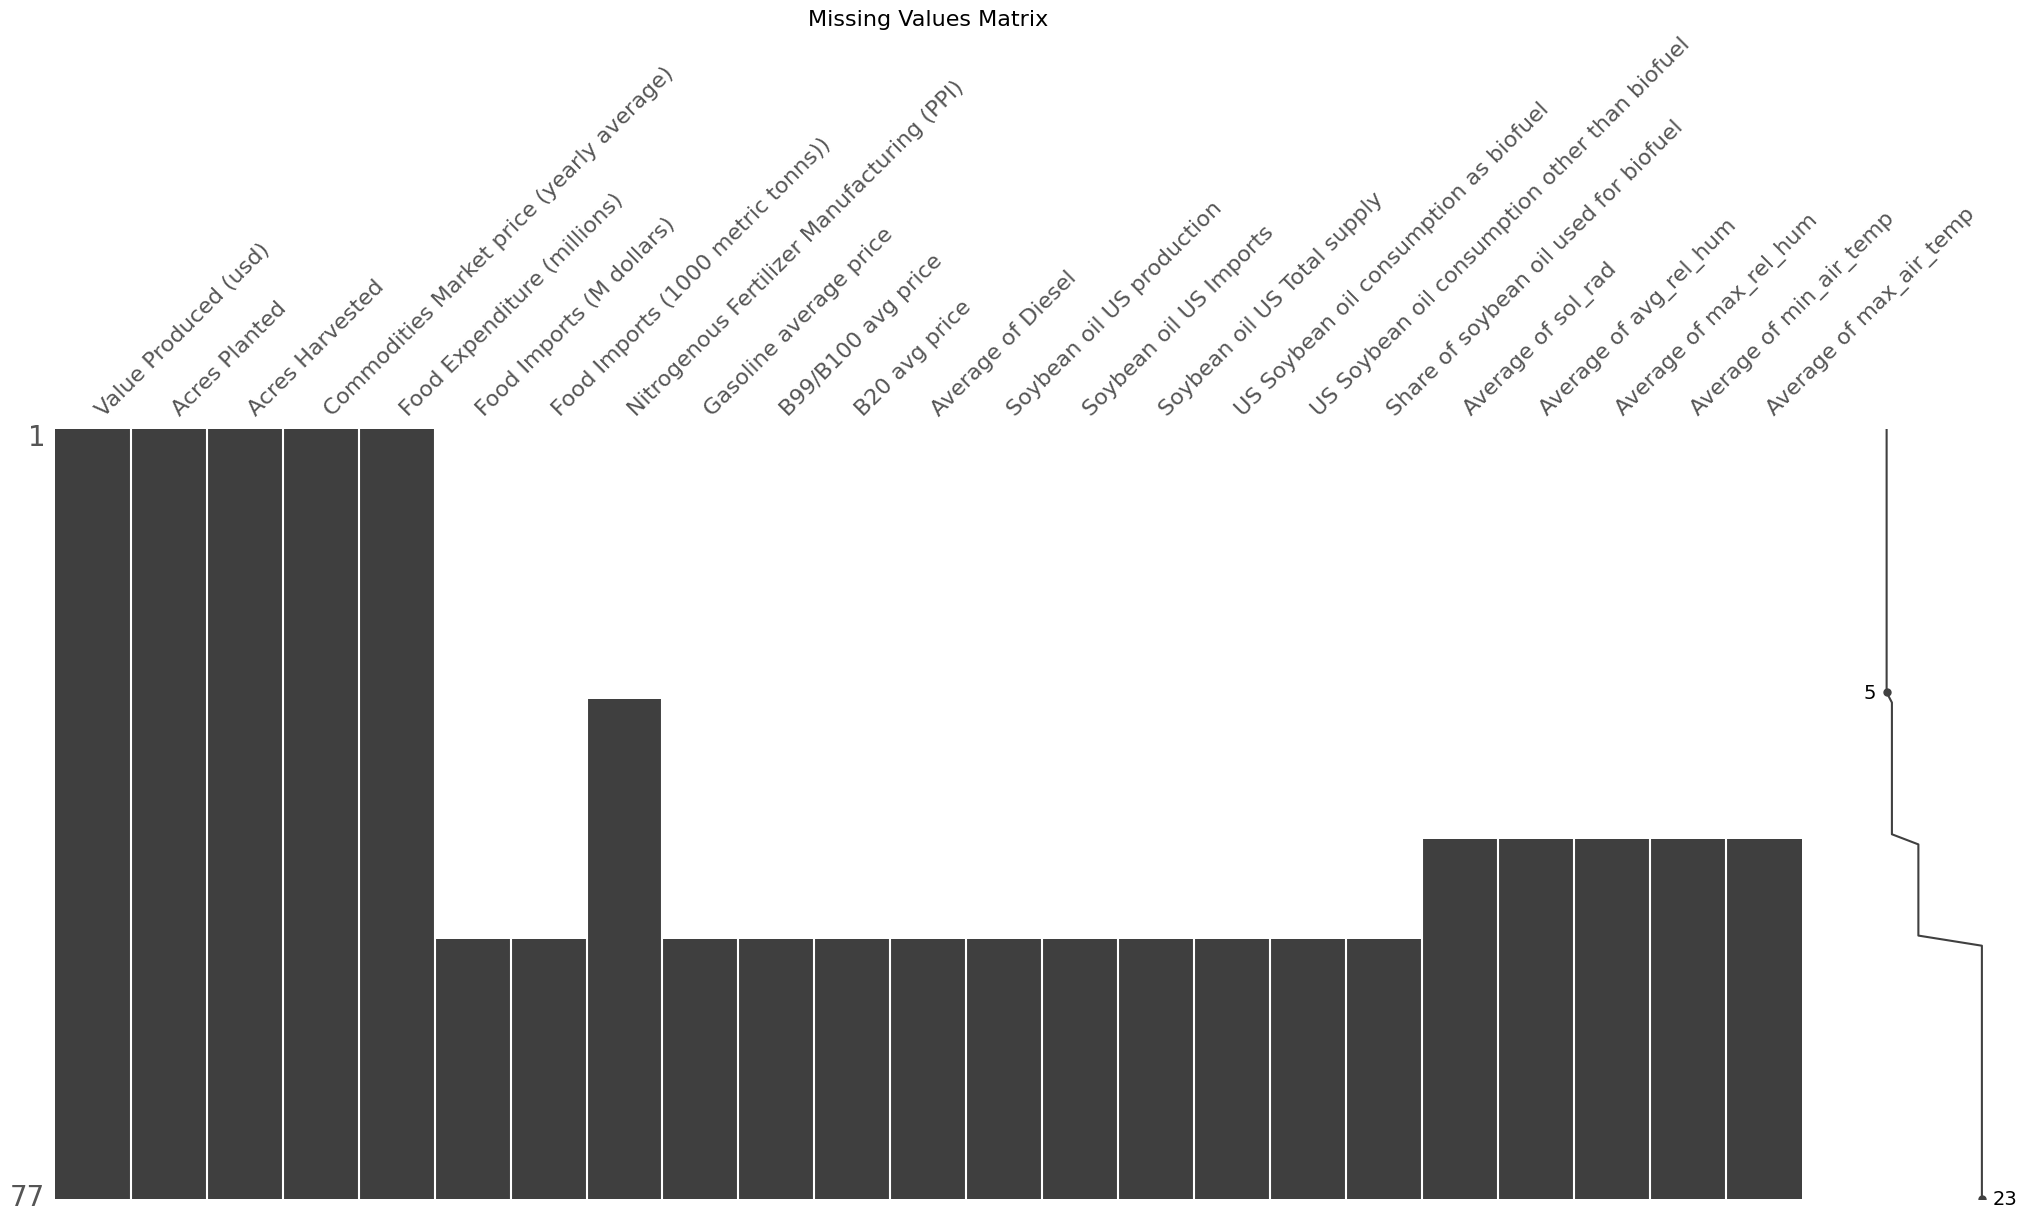

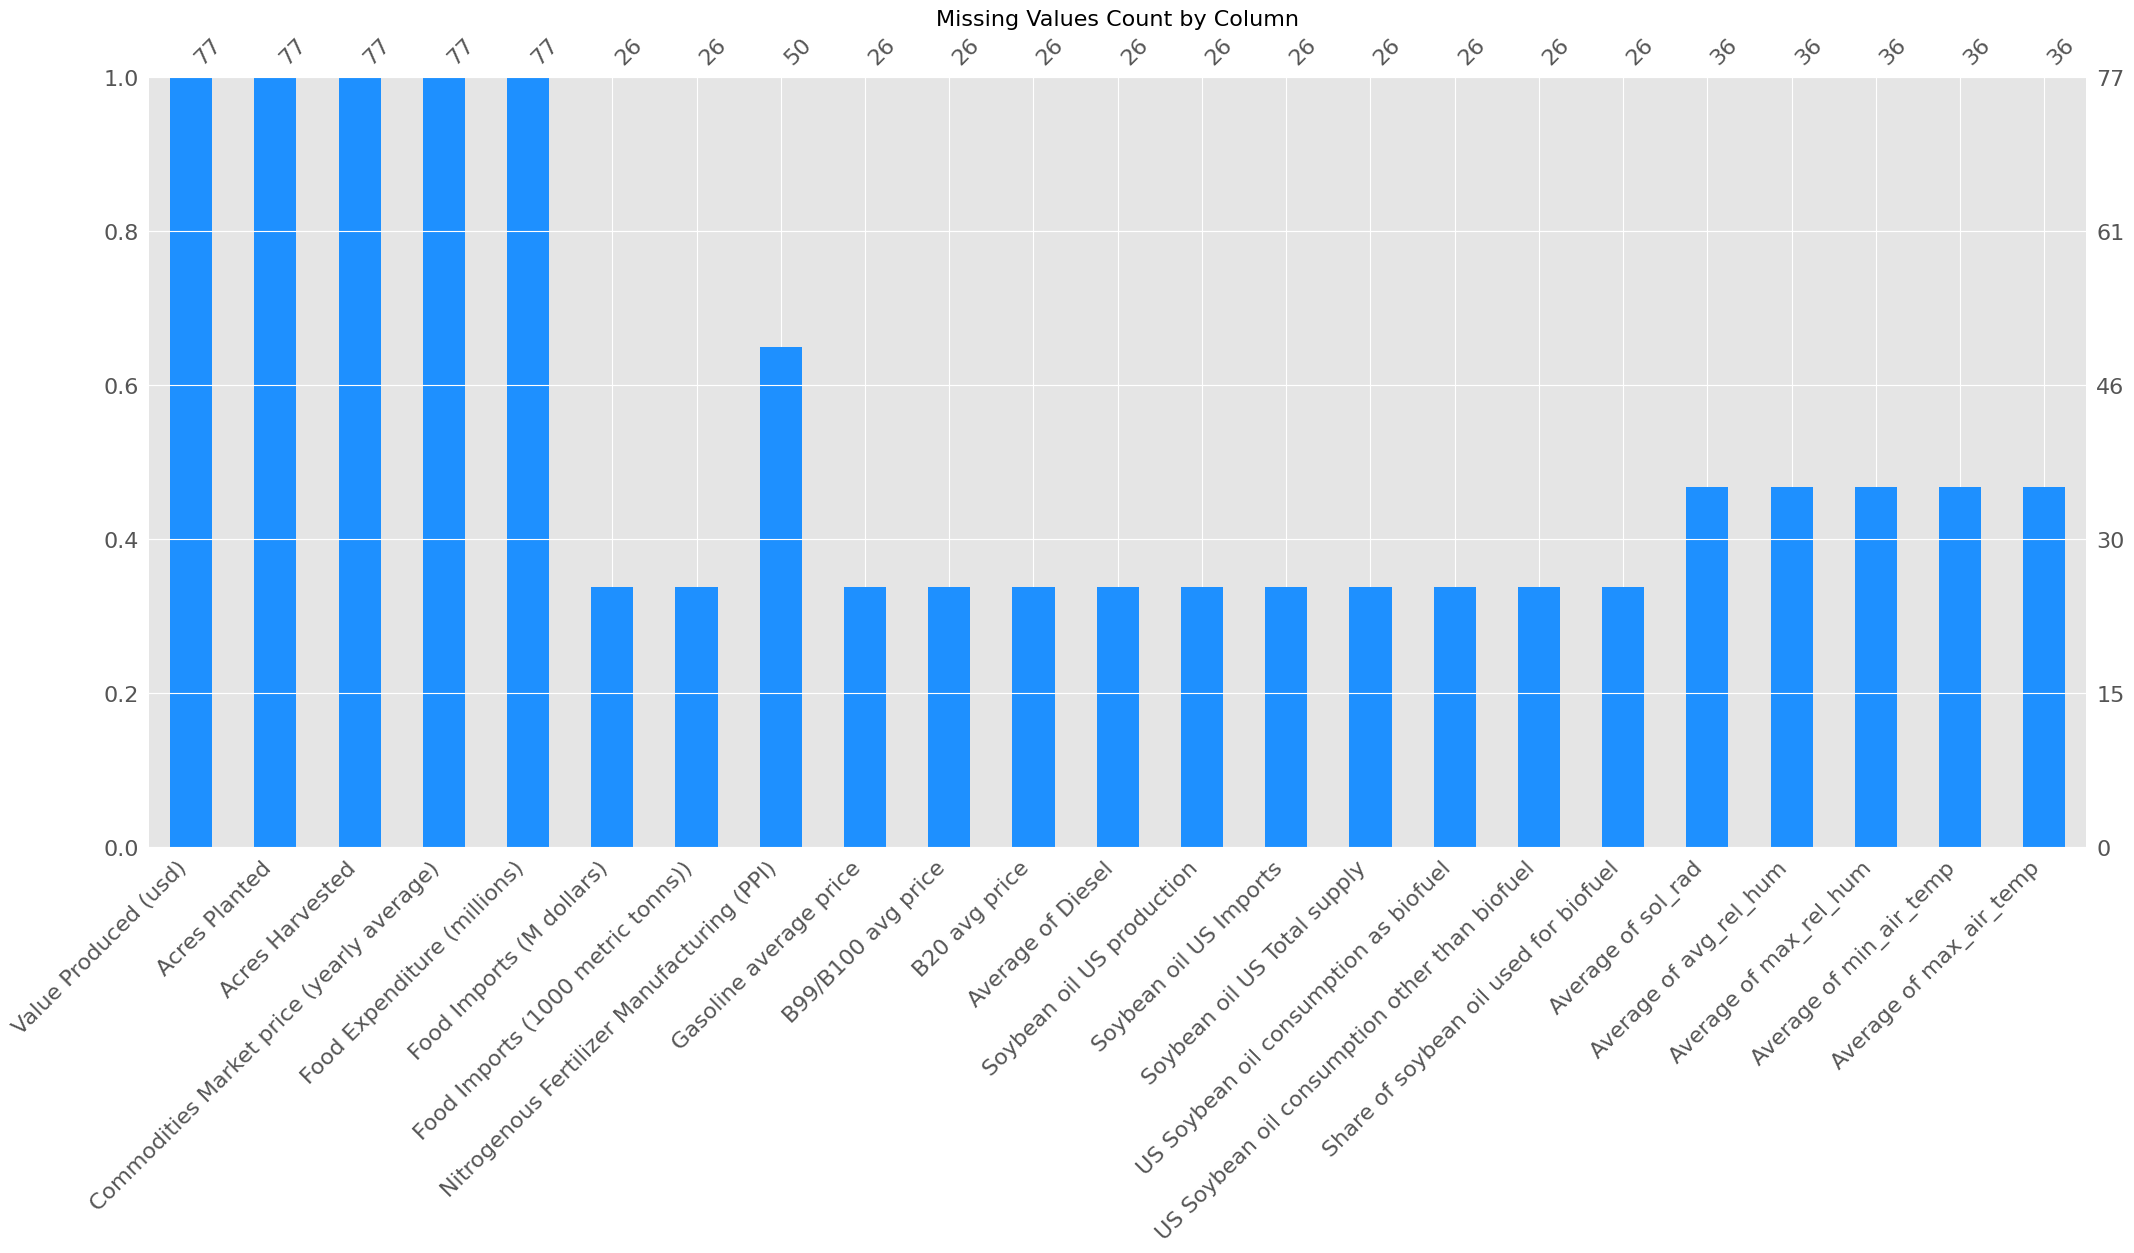

In [30]:
# Visualize missing values
plt.figure(figsize=(12, 6))
msno.matrix(df)
plt.title('Missing Values Matrix', fontsize=16)
plt.show()

plt.figure(figsize=(12, 6))
msno.bar(df, color='dodgerblue')
plt.title('Missing Values Count by Column', fontsize=16)
plt.show()

Agricultural data has the largest time span, whereas economic indicators appear to be consistently more recent.

In [ ]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\nNumerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")



Numerical columns: ['Value Produced (usd)', 'Acres Planted', 'Acres Harvested', 'Commodities Market price (yearly average)', 'Food Expenditure (millions)', 'Food Imports (M dollars)', 'Food Imports (1000 metric tonns))', 'Nitrogenous Fertilizer Manufacturing (PPI)', 'Gasoline average price', 'B99/B100 avg price', 'B20 avg price', 'Average of Diesel', 'Soybean oil US production', 'Soybean oil US Imports', 'Soybean oil US Total supply', 'US Soybean oil consumption as biofuel', 'US Soybean oil consumption other than biofuel', 'Share of soybean oil used for biofuel', 'Average of sol_rad', 'Average of avg_rel_hum', 'Average of max_rel_hum', 'Average of min_air_temp', 'Average of max_air_temp']
Categorical columns: []


There is no non-numerical data.

In [ ]:
# Removing null values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 1999 to 2024
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Value Produced (usd)                           26 non-null     float64
 1   Acres Planted                                  26 non-null     float64
 2   Acres Harvested                                26 non-null     float64
 3   Commodities Market price (yearly average)      26 non-null     float64
 4   Food Expenditure (millions)                    26 non-null     float64
 5   Food Imports (M dollars)                       26 non-null     float64
 6   Food Imports (1000 metric tonns))              26 non-null     float64
 7   Nitrogenous Fertilizer Manufacturing (PPI)     26 non-null     float64
 8   Gasoline average price                         26 non-null     float64
 9   B99/B100 avg price                             26 non-nu

In [33]:
df.isnull().sum()

Value Produced (usd)                             0
Acres Planted                                    0
Acres Harvested                                  0
Commodities Market price (yearly average)        0
Food Expenditure (millions)                      0
Food Imports (M dollars)                         0
Food Imports (1000 metric tonns))                0
Nitrogenous Fertilizer Manufacturing (PPI)       0
Gasoline average price                           0
B99/B100 avg price                               0
B20 avg price                                    0
Average of Diesel                                0
Soybean oil US production                        0
Soybean oil US Imports                           0
Soybean oil US Total supply                      0
US Soybean oil consumption as biofuel            0
US Soybean oil consumption other than biofuel    0
Share of soybean oil used for biofuel            0
Average of sol_rad                               0
Average of avg_rel_hum         

In [34]:
# current columns
df.columns

Index(['Value Produced (usd)', 'Acres Planted', 'Acres Harvested',
       'Commodities Market price (yearly average)',
       'Food Expenditure (millions)', 'Food Imports (M dollars)',
       'Food Imports (1000 metric tonns))',
       'Nitrogenous Fertilizer Manufacturing (PPI)', 'Gasoline average price',
       'B99/B100 avg price', 'B20 avg price', 'Average of Diesel',
       'Soybean oil US production', 'Soybean oil US Imports',
       'Soybean oil US Total supply', 'US Soybean oil consumption as biofuel',
       'US Soybean oil consumption other than biofuel',
       'Share of soybean oil used for biofuel', 'Average of sol_rad',
       'Average of avg_rel_hum', 'Average of max_rel_hum',
       'Average of min_air_temp', 'Average of max_air_temp'],
      dtype='object')

_______________________
**2) VISUALISING CORRELATIONS**

Correlation will be displayed via a Correlation matrix. A correlation matrix is a table that shows the correlation coefficients between multiple variables in a dataset. It is a powerful tool used in statistics and data analysis to understand the relationships between different variables.

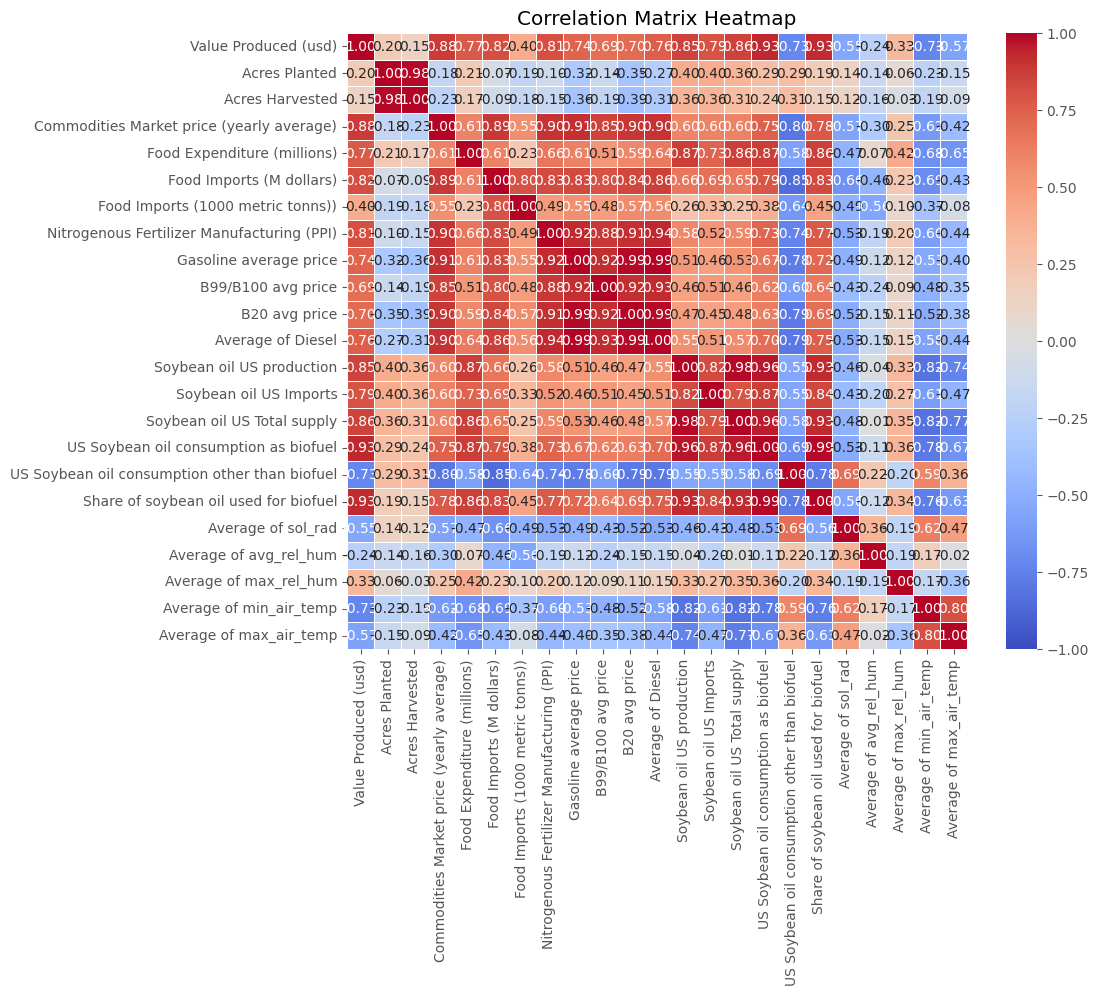

In [35]:
# build matrix
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True,   # Show correlation values
            fmt=".2f",   # Round to 2 decimal places
            cmap="coolwarm",  # Color map
            vmin=-1, vmax=1,  # Scale from -1 to 1
            linewidths=0.5)

plt.title("Correlation Matrix Heatmap")
plt.show()

We can see that temperature features hold the least significant amout of correlation.

In [36]:
# remove temperature columns
df = df.drop(['Average of sol_rad',
       'Average of avg_rel_hum', 'Average of max_rel_hum',
       'Average of min_air_temp', 'Average of max_air_temp'],axis=1)

df.head()

,Value Produced (usd),Acres Planted,Acres Harvested,Commodities Market price (yearly average),Food Expenditure (millions),Food Imports (M dollars),Food Imports (1000 metric tonns)),Nitrogenous Fertilizer Manufacturing (PPI),Gasoline average price,B99/B100 avg price,B20 avg price,Average of Diesel,Soybean oil US production,Soybean oil US Imports,Soybean oil US Total supply,US Soybean oil consumption as biofuel,US Soybean oil consumption other than biofuel,Share of soybean oil used for biofuel
Year,,,,,,,,,,,,,,,,,,
1999,2.104725e+09,10600000.0,10550000.0,47.751693,23907.06,731.4,5295.2,118.591667,1.07632,2.778033,0.854071,0.889820,18.223519,63.99826,20388.930637,-1053.534596,17815.443653,-5.142892
2000,2.124276e+09,10500000.0,10450000.0,50.033333,24691.06,663.3,4763.6,144.708333,1.52850,2.994475,1.082423,1.374643,17.658920,104.25457,20666.524570,-507.846900,16961.283760,-2.660569
2001,2.174445e+09,10700000.0,10620000.0,45.965442,24851.40,762.7,5406.3,171.725000,1.47200,3.033305,1.258518,1.279747,18.898300,45.95800,21711.158000,91.846800,16741.468500,0.474595
2002,2.567659e+09,10600000.0,10527994.5,51.316375,25308.54,736.4,4640.8,131.650000,1.34125,3.091548,1.331181,1.192984,18.430200,46.02480,20834.724800,120.669600,16962.006000,0.623744
2003,2.850946e+09,10300000.0,10260000.0,63.340119,25778.93,632.5,3616.3,177.016667,1.54150,3.149792,1.585503,1.420284,17.080600,306.18700,18875.487000,124.371500,16739.535100,0.698721


________________
**3) SPLITTING & SCALING**

When splitting data after scaling, information from the test set "leaks" into the training set (since scaling uses global statistics like mean/std). This biases the model and inflates performance metrics unrealistically. Scaling X and y together also treats them as part of the same distribution, which is incorrect, as X (features) are inputs; y (target) is the output. They serve different roles in modeling.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# For predicting Soybean harvesting
# Separate features (X) and target (y)
soy_X = df.drop(columns=['Acres Harvested'])
soy_y = df['Acres Harvested']

# Split data
soy_X_train, soy_X_test, soy_y_train, soy_y_test = train_test_split(soy_X, soy_y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
soy_X_train_scaled = scaler.fit_transform(soy_X_train)
soy_X_test_scaled = scaler.transform(soy_X_test)

In [ ]:
# For predicting Biofuel Production
# Separate features (X) and target (y)
oil_X = df.drop(columns=['Soybean oil US production'])
oil_y = df['Soybean oil US production']

# Split data
oil_X_train, oil_X_test, oil_y_train,oil_y_test = train_test_split(oil_X, oil_y, test_size=0.2, random_state=42)

# Scale features
oil_X_train_scaled = scaler.fit_transform(oil_X_train)
oil_X_test_scaled = scaler.transform(oil_X_test)

________________________
**4) Model Building (Soy Harvesting)**

In [ ]:
# Importing necessary libraries
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # importing evaluation metrics tools
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
import seaborn as sns


*Linear Regression*


Baseline Linear Regression Performance:
Train RMSE: 30410.3321, Test RMSE: 428435.6887
Train R2: 0.9974, Test R2: 0.6935
Train MAE: 24213.7031, Test MAE: 303126.3130
Cross-validated R2 scores: [-0.93746658  0.542721    0.34559327  0.76312177  0.54313372]
Mean CV R2: 0.2514 (±0.6090)


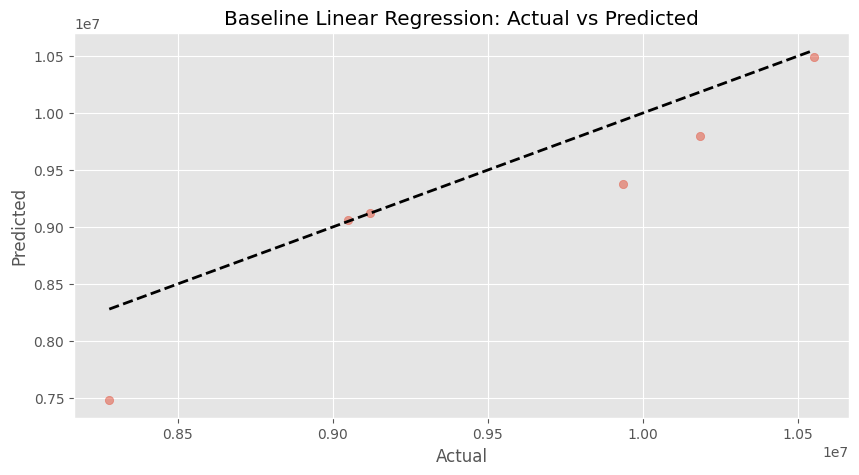


Polynomial (Degree 2) Linear Regression Performance:
Train RMSE: 0.0000, Test RMSE: 287523.2402
Train R2: 1.0000, Test R2: 0.8619
Train MAE: 0.0000, Test MAE: 230287.4431
Cross-validated R2 scores: [ 0.29715924  0.67828356 -0.27945033  0.68522344 -1.48743246]
Mean CV R2: -0.0212 (±0.8132)


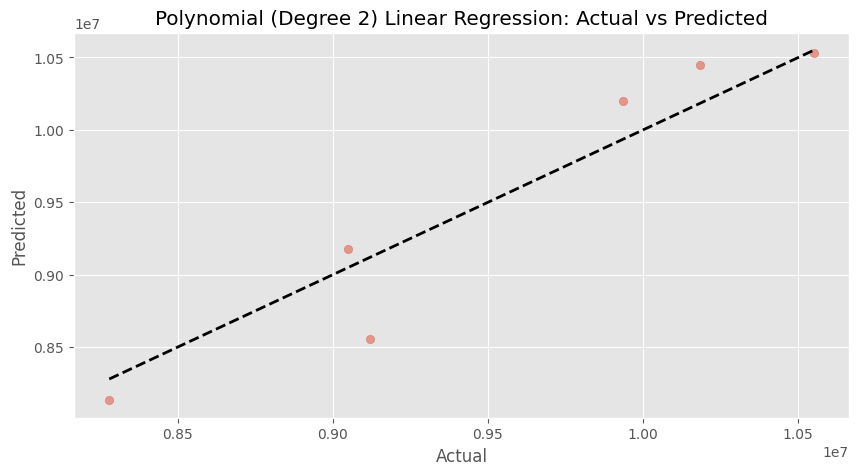

fit_intercept=True: Mean CV R2 = -0.1815
fit_intercept=False: Mean CV R2 = -291528.0323

Best parameters: {'fit_intercept': True}

Tuned Linear Regression Performance:
Train RMSE: 30410.3321, Test RMSE: 428435.6887
Train R2: 0.9974, Test R2: 0.6935
Train MAE: 24213.7031, Test MAE: 303126.3130
Cross-validated R2 scores: [-0.93746658  0.542721    0.34559327  0.76312177  0.54313372]
Mean CV R2: 0.2514 (±0.6090)


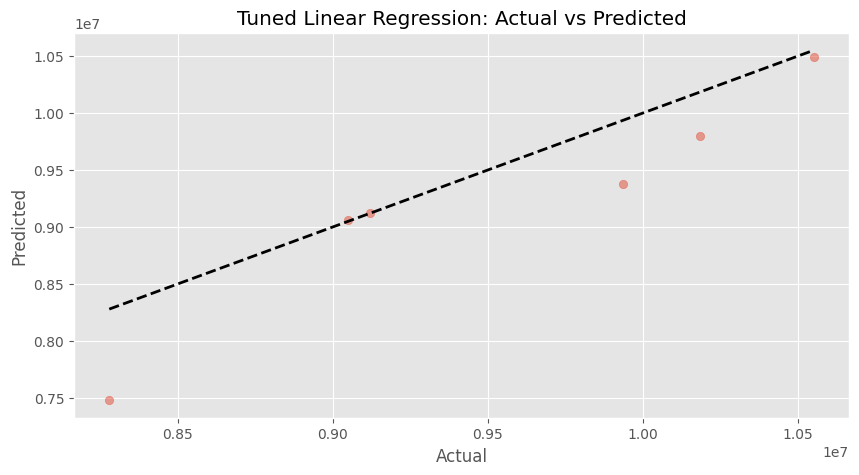


Feature Importance (Absolute Coefficient Values):
    Feature   Coefficient
10       10  1.072719e+06
13       13 -8.750437e+05
11       11  8.699180e+05
1         1  8.378922e+05
4         4 -3.920096e+05
14       14 -3.427743e+05
15       15 -3.427485e+05
6         6 -3.180104e+05
7         7 -2.966437e+05
0         0  2.654727e+05
9         9 -2.139790e+05
3         3 -1.203904e+05
8         8 -9.145579e+04
12       12 -7.222358e+04
2         2  5.242924e+04
5         5  5.213756e+04
16       16 -6.682427e+02


In [ ]:
# function to evaluate the model
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Linear Regression"):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on train and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    # Print metrics
    print(f"\n{model_name} Performance:")
    print(f"Train RMSE: {train_rmse:.4f}, Test RMSE: {test_rmse:.4f}")
    print(f"Train R2: {train_r2:.4f}, Test R2: {test_r2:.4f}")
    print(f"Train MAE: {train_mae:.4f}, Test MAE: {test_mae:.4f}")
    
    # Cross-validation
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
    print(f"Cross-validated R2 scores: {cv_scores}")
    print(f"Mean CV R2: {np.mean(cv_scores):.4f} (±{np.std(cv_scores):.4f})")
    
    # Plot actual vs predicted values
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test, y_test_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{model_name}: Actual vs Predicted')
    plt.show()
    
   
    
    return model

# Baseline Linear Regression
lr_model = LinearRegression()
evaluate_model(lr_model, soy_X_train_scaled, soy_y_train, soy_X_test_scaled, soy_y_test, "Baseline Linear Regression")

# Linear Regression with Polynomial Features
degree = 2  # Experiment with different degrees
poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=degree)),
    ('linear', LinearRegression())
])
evaluate_model(poly_model, soy_X_train_scaled, soy_y_train, soy_X_test_scaled, soy_y_test, f"Polynomial (Degree {degree}) Linear Regression")

# Linear Regression with different parameters
param_grid = {
    'fit_intercept': [True, False],
    # 'normalize': [True, False]  # Deprecated in newer versions
}

best_score = -np.inf
best_params = {}

for fit_intercept in param_grid['fit_intercept']:
    lr = LinearRegression(fit_intercept=fit_intercept)
    scores = cross_val_score(lr, soy_X_train_scaled, soy_y_train, cv=5, scoring='r2')
    mean_score = np.mean(scores)
    print(f"fit_intercept={fit_intercept}: Mean CV R2 = {mean_score:.4f}")
    
    if mean_score > best_score:
        best_score = mean_score
        best_params = {'fit_intercept': fit_intercept}

print("\nBest parameters:", best_params)
best_lr = LinearRegression(**best_params)
evaluate_model(best_lr, soy_X_train_scaled, soy_y_train, soy_X_test_scaled, soy_y_test, "Tuned Linear Regression")

# Feature importance (coefficients)
if hasattr(lr_model, 'coef_'):
    feature_importance = pd.DataFrame({
        'Feature': range(soy_X_train_scaled.shape[1]),  # Replace with actual feature names if available
        'Coefficient': lr_model.coef_
    }).sort_values('Coefficient', key=abs, ascending=False)
    
    print("\nFeature Importance (Absolute Coefficient Values):")
    print(feature_importance)

*Support Vector Machine (Regression)*

In [ ]:
# Define parameter grid
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'epsilon': [0.01, 0.1, 0.5, 1.0],  # Controls width of the epsilon-insensitive zone
    'gamma': ['scale', 'auto'] + [0.001, 0.01, 0.1]  # Kernel coefficient (for 'rbf'/'poly')
}

# Create base model
svm_model = SVR()

# Set up cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=svm_model, 
                          param_grid=param_grid, 
                          cv=kfold,
                          scoring='neg_mean_squared_error',
                          verbose=1,
                          n_jobs=-1)

# Fit the grid search
grid_search.fit(soy_X_train_scaled, soy_y_train)

# Get best model
best_svm = grid_search.best_estimator_

# Predict and evaluate
svm_preds = best_svm.predict(soy_X_test_scaled)

print("\nOptimized Support Vector Regression:")
print("Best Parameters:", grid_search.best_params_)
print("RMSE:", mean_squared_error(soy_y_test, svm_preds, squared=False))
print("MAE:", mean_absolute_error(soy_y_test, svm_preds))
print("R2 Score:", r2_score(soy_y_test, svm_preds))

# Actual vs Predicted plot
plt.figure(figsize=(8, 6))
plt.scatter(soy_y_test, svm_preds, alpha=0.5)
plt.plot([soy_y_test.min(), soy_y_test.max()], 
         [soy_y_test.min(), soy_y_test.max()], 'k--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVM: Actual vs Predicted Values')
plt.show()

# Learning curve 
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_svm, soy_X_train_scaled, soy_y_train, cv=kfold, 
    scoring='neg_mean_squared_error', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5))

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("MSE")
plt.legend()
plt.title("SVM Learning Curve")
plt.show()

*Random Forest*

Fitting 5 folds for each of 648 candidates, totalling 3240 fits

Optimized Random Forest Regression:
Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
RMSE: 353681.62139000464
MAE: 216975.89295635154
R2 Score: 0.7911106334905502


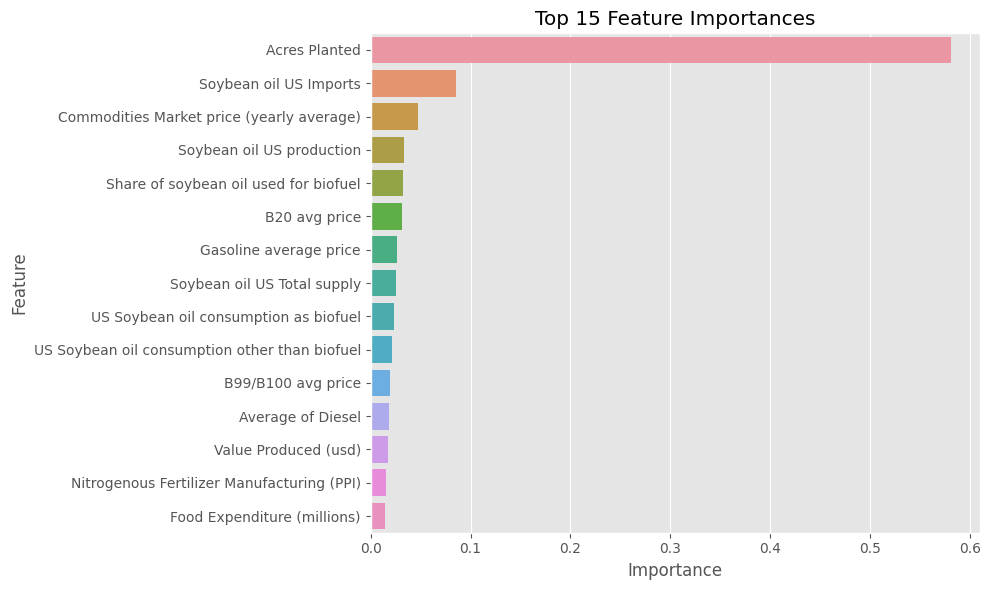

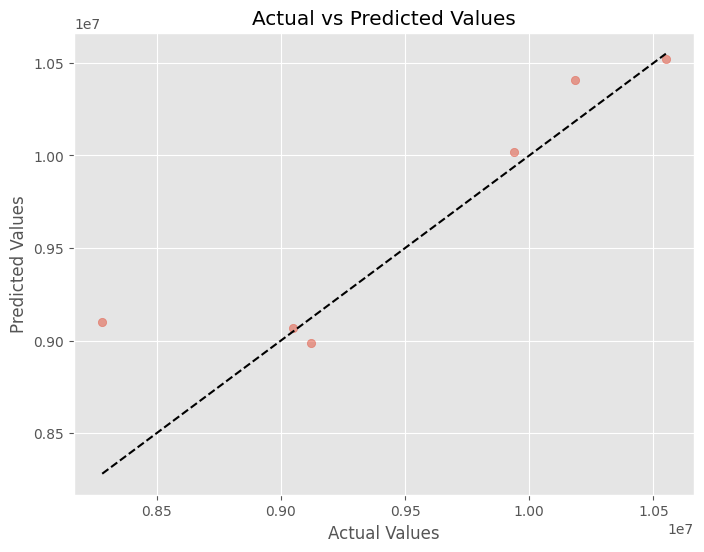

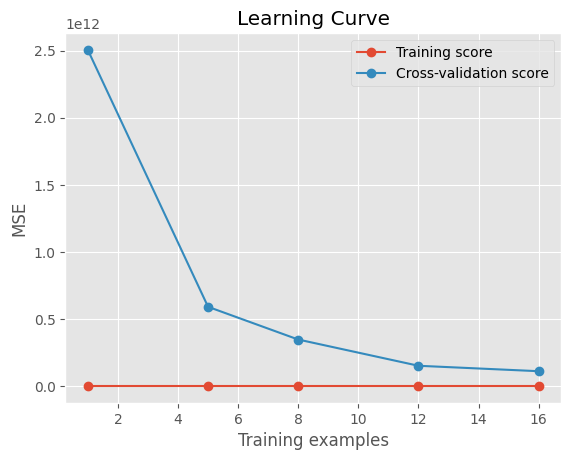

In [ ]:
# Define a more comprehensive parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 0.5],
    'bootstrap': [True, False]
}

# Create base model
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

# Set up cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, 
                          param_grid=param_grid, 
                          cv=kfold,
                          scoring='neg_mean_squared_error',
                          verbose=1,
                          n_jobs=-1)

# Fit the grid search
grid_search.fit(soy_X_train_scaled, soy_y_train)

# Get best model
best_rf = grid_search.best_estimator_

# Predict and evaluate
rf_preds = best_rf.predict(soy_X_test_scaled)

print("\nOptimized Random Forest Regression:")
print("Best Parameters:", grid_search.best_params_)
print("RMSE:", mean_squared_error(soy_y_test, rf_preds, squared=False))
print("MAE:", mean_absolute_error(soy_y_test, rf_preds))
print("R2 Score:", r2_score(soy_y_test, rf_preds))

# Feature importance analysis
feature_importances = best_rf.feature_importances_
features = soy_X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
plt.title('Top 15 Feature Importances')
plt.tight_layout()
plt.show()

# Actual vs Predicted plot
plt.figure(figsize=(8, 6))
plt.scatter(soy_y_test, rf_preds, alpha=0.5)
plt.plot([soy_y_test.min(), soy_y_test.max()], 
         [soy_y_test.min(), soy_y_test.max()], 'k--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# Learning curve 
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_rf, soy_X_train_scaled, soy_y_train, cv=kfold, 
    scoring='neg_mean_squared_error', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5))

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("MSE")
plt.legend()
plt.title("Learning Curve")
plt.show()

*Bayesian Regression*

Fitting 5 folds for each of 1458 candidates, totalling 7290 fits

Optimized Bayesian Ridge Regression:
Best Parameters: {'alpha_1': 0.0001, 'alpha_2': 1e-06, 'compute_score': True, 'lambda_1': 1e-06, 'lambda_2': 0.0001, 'n_iter': 100, 'tol': 0.001}
Cross-Validation RMSE: 591091.3347 (±195586.2040)
Test RMSE: 926386.3607051434
Test MAE: 734200.6886569383
Test R2 Score: -0.4330972138041662


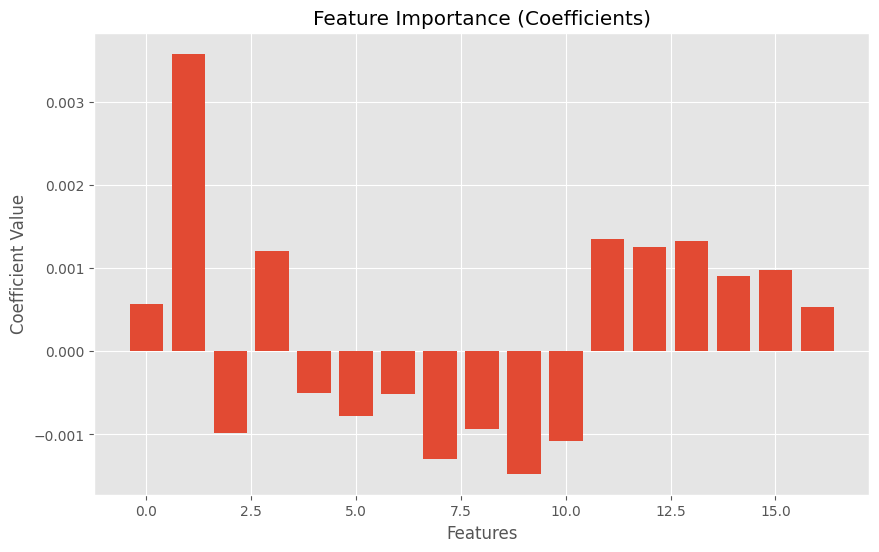

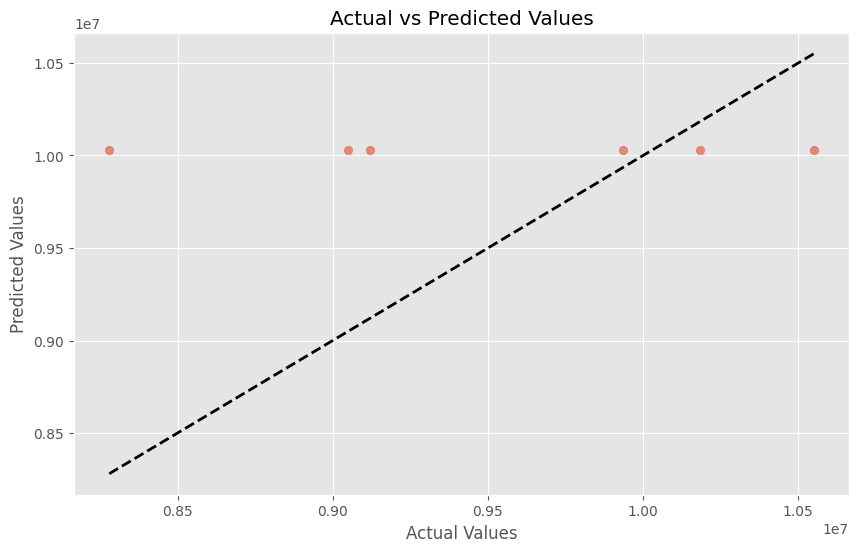

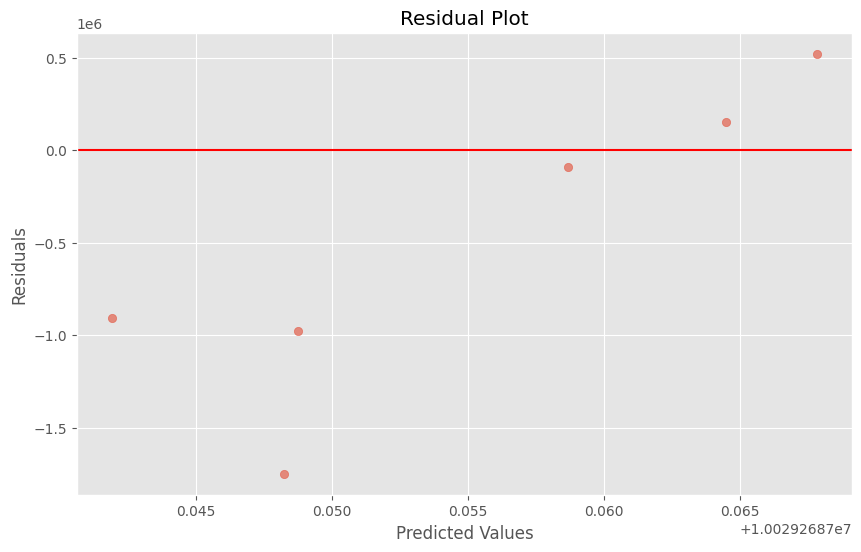

In [ ]:
# Define the parameter grid for tuning
param_grid = {
    'n_iter': [100, 200, 300],
    'tol': [1e-3, 1e-4, 1e-5],
    'alpha_1': [1e-6, 1e-5, 1e-4],
    'alpha_2': [1e-6, 1e-5, 1e-4],
    'lambda_1': [1e-6, 1e-5, 1e-4],
    'lambda_2': [1e-6, 1e-5, 1e-4],
    'compute_score': [True, False]
}

# Initialize Bayesian Ridge model
bayes_model = BayesianRidge()

# Set up KFold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(bayes_model, param_grid, cv=kfold, 
                          scoring='neg_mean_squared_error',
                          n_jobs=-1, verbose=1)
grid_search.fit(soy_X_train_scaled, soy_y_train)

# Get the best model
best_bayes_model = grid_search.best_estimator_

# Cross-validation scores
cv_scores = cross_val_score(best_bayes_model, soy_X_train_scaled, soy_y_train, 
                           cv=kfold, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

# Predict and evaluate
bayes_preds = best_bayes_model.predict(soy_X_test_scaled)

print("\nOptimized Bayesian Ridge Regression:")
print("Best Parameters:", grid_search.best_params_)
print(f"Cross-Validation RMSE: {cv_rmse_scores.mean():.4f} (±{cv_rmse_scores.std():.4f})")
print("Test RMSE:", mean_squared_error(soy_y_test, bayes_preds, squared=False))
print("Test MAE:", mean_absolute_error(soy_y_test, bayes_preds))
print("Test R2 Score:", r2_score(soy_y_test, bayes_preds))

# Feature importance analysis
if hasattr(best_bayes_model, 'coef_'):
    feature_importance = best_bayes_model.coef_
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_importance)), feature_importance)
    plt.title("Feature Importance (Coefficients)")
    plt.xlabel("Features")
    plt.ylabel("Coefficient Value")
    plt.show()

# Actual vs Predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(soy_y_test, bayes_preds, alpha=0.6)
plt.plot([soy_y_test.min(), soy_y_test.max()], 
         [soy_y_test.min(), soy_y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

# Residual plot
residuals = soy_y_test - bayes_preds
plt.figure(figsize=(10, 6))
plt.scatter(bayes_preds, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

*K-Nearest Neighbour*

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best KNN Parameters:
{'metric': 'euclidean', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

Cross-validated R2 scores: [ 0.61292027  0.68469624  0.54759641 -0.33590643  0.23010583]
Mean CV R2: 0.348 ± 0.376

Optimized K-Nearest Neighbors Regression:
RMSE: 557045.7072025235
R2 Score: 0.4818291108912022


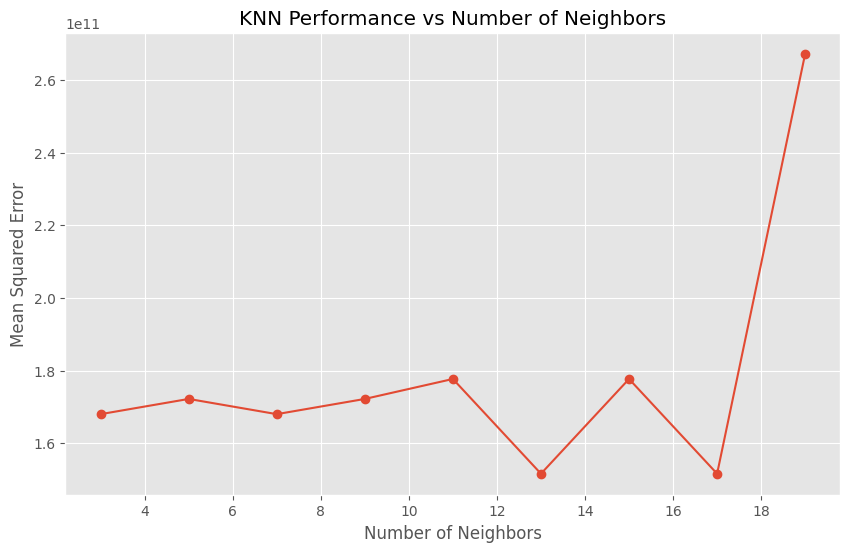

Acres Planted: 0.195 ± 0.113
B20 avg price: 0.010 ± 0.103
Average of Diesel: 0.005 ± 0.103
Soybean oil US production: 0.005 ± 0.018
Gasoline average price: -0.001 ± 0.097
Food Imports (1000 metric tonns)): -0.002 ± 0.001
US Soybean oil consumption other than biofuel: -0.003 ± 0.023
Soybean oil US Imports: -0.005 ± 0.064
Value Produced (usd): -0.011 ± 0.012
Commodities Market price (yearly average): -0.015 ± 0.073
Soybean oil US Total supply: -0.022 ± 0.012
Share of soybean oil used for biofuel: -0.025 ± 0.012
Food Expenditure (millions): -0.026 ± 0.018
US Soybean oil consumption as biofuel: -0.026 ± 0.012
Nitrogenous Fertilizer Manufacturing (PPI): -0.028 ± 0.065
Food Imports (M dollars): -0.033 ± 0.069
B99/B100 avg price: -0.083 ± 0.081


In [ ]:
# Define parameter grid to search
param_grid = {
    'n_neighbors': range(3, 21, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]  # Power parameter for Minkowski metric
}

# Initialize and fit GridSearchCV
knn_grid = GridSearchCV(KNeighborsRegressor(), 
                        param_grid, 
                        cv=5,
                        scoring='neg_mean_squared_error',
                        n_jobs=-1,
                        verbose=1)
knn_grid.fit(soy_X_train_scaled, soy_y_train)

# Print best parameters
print("Best KNN Parameters:")
print(knn_grid.best_params_)

# Get best model
best_knn = knn_grid.best_estimator_

# Cross-validation evaluation
cv_scores = cross_val_score(best_knn, 
                           soy_X_train_scaled, 
                           soy_y_train, 
                           cv=5, 
                           scoring='r2')
print(f"\nCross-validated R2 scores: {cv_scores}")
print(f"Mean CV R2: {np.mean(cv_scores):.3f} ± {np.std(cv_scores):.3f}")

# Final evaluation on test set
knn_preds = best_knn.predict(soy_X_test_scaled)
print("\nOptimized K-Nearest Neighbors Regression:")
print("RMSE:", mean_squared_error(soy_y_test, knn_preds, squared=False))
print("R2 Score:", r2_score(soy_y_test, knn_preds))

# Visualize performance across different n_neighbors
results = knn_grid.cv_results_
neighbors = param_grid['n_neighbors']
mean_scores = [-results[f'split{i}_test_score'] for i in range(5)]
mean_scores = np.mean(mean_scores, axis=0)[:len(neighbors)]

plt.figure(figsize=(10, 6))
plt.plot(neighbors, mean_scores, 'o-')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Squared Error')
plt.title('KNN Performance vs Number of Neighbors')
plt.grid(True)
plt.show()

# Feature importance analysis (for KNN with distance weighting)
if best_knn.weights == 'distance':
    from sklearn.inspection import permutation_importance
    r = permutation_importance(best_knn, 
                              soy_X_test_scaled, 
                              soy_y_test,
                              n_repeats=10,
                              random_state=42)
    
    for i in r.importances_mean.argsort()[::-1]:
        print(f"{soy_X_train.columns[i]:<8}: "
              f"{r.importances_mean[i]:.3f} ± "
              f"{r.importances_std[i]:.3f}")

*Artificial Neural Networks*

In [ ]:
# Define the parameter grid to search
param_grid = {
    'hidden_layer_sizes': [(64, 32), (128, 64), (64, 32, 16), (128, 64, 32)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],  # L2 regularization parameter
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [1000, 1500, 2000],
    'early_stopping': [True, False],
    'batch_size': [32, 64, 128]
}

# Initialize the MLPRegressor
ann_model = MLPRegressor(random_state=42)

# Use GridSearchCV for exhaustive search (or RandomizedSearchCV for faster search)
search = GridSearchCV(
    ann_model,
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1,  # Use all available cores
    verbose=1
)

# Fit the model (this will take longer as it tests all combinations)
print("Starting grid search...")
search.fit(soy_X_train_scaled, soy_y_train)

# Get the best model
best_ann_model = search.best_estimator_

# Print best parameters
print("\nBest parameters found:")
print(search.best_params_)

# Predict and evaluate
ann_preds = best_ann_model.predict(soy_X_test_scaled)

print("\nArtificial Neural Network Regression:")
print("RMSE:", mean_squared_error(soy_y_test, ann_preds, squared=False))
print("MAE:", mean_absolute_error(soy_y_test, ann_preds))
print("R2 Score:", r2_score(soy_y_test, ann_preds))

# Optional: Print training scores for best model
print("\nTraining scores:")
train_preds = best_ann_model.predict(soy_X_train_scaled)
print("Train RMSE:", mean_squared_error(soy_y_train, train_preds, squared=False))
print("Train R2 Score:", r2_score(soy_y_train, train_preds))

Starting grid search...
Fitting 5 folds for each of 2592 candidates, totalling 12960 fits

Best parameters found:
{'activation': 'logistic', 'alpha': 0.01, 'batch_size': 32, 'early_stopping': True, 'hidden_layer_sizes': (64, 32), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'lbfgs'}

Artificial Neural Network Regression:
RMSE: 926386.509199821
MAE: 734200.7820418613
R2 Score: -0.43309767323952686

Training scores:
Train RMSE: 596552.5118305715
Train R2 Score: -1.7852386235972517e-13


________________________
**5) Model Building (Soy Oil Production)**

*Linear Regression*


Baseline Linear Regression Performance:
Train RMSE: 0.0907, Test RMSE: 1.0696
Train R2: 0.9992, Test R2: 0.8771
Train MAE: 0.0770, Test MAE: 0.7659
Cross-validated R2 scores: [-2.00438458  0.92808834  0.8918688   0.72115602  0.97528445]
Mean CV R2: 0.3024 (±1.1566)


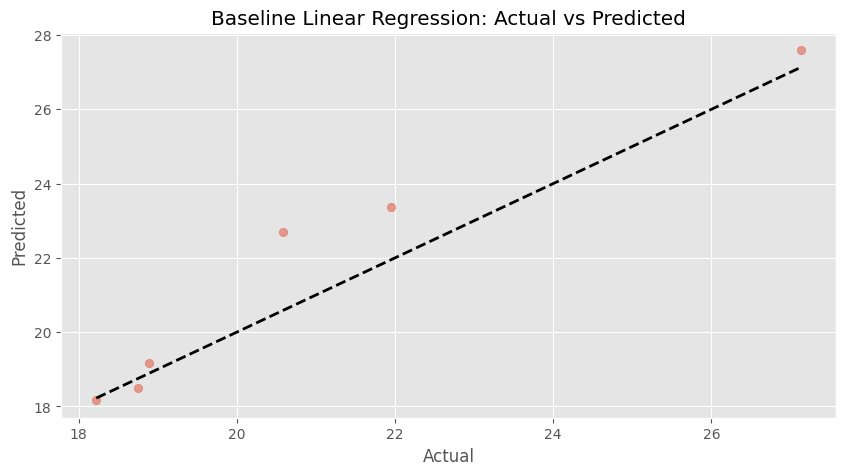


Polynomial (Degree 2) Linear Regression Performance:
Train RMSE: 0.0000, Test RMSE: 1.2442
Train R2: 1.0000, Test R2: 0.8338
Train MAE: 0.0000, Test MAE: 0.8593
Cross-validated R2 scores: [0.22966476 0.96438265 0.69670263 0.75269392 0.83188521]
Mean CV R2: 0.6951 (±0.2495)


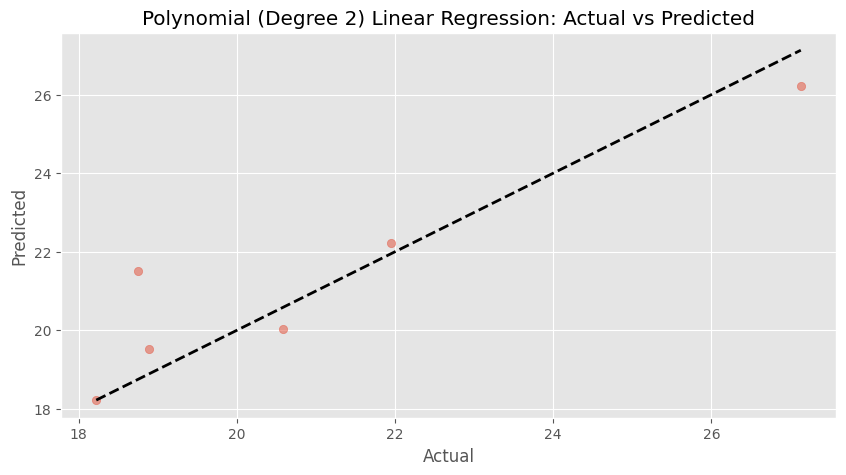

fit_intercept=True: Mean CV R2 = -0.1637
fit_intercept=False: Mean CV R2 = -20588.1576

Best parameters: {'fit_intercept': True}

Tuned Linear Regression Performance:
Train RMSE: 0.0907, Test RMSE: 1.0696
Train R2: 0.9992, Test R2: 0.8771
Train MAE: 0.0770, Test MAE: 0.7659
Cross-validated R2 scores: [-2.00438458  0.92808834  0.8918688   0.72115602  0.97528445]
Mean CV R2: 0.3024 (±1.1566)


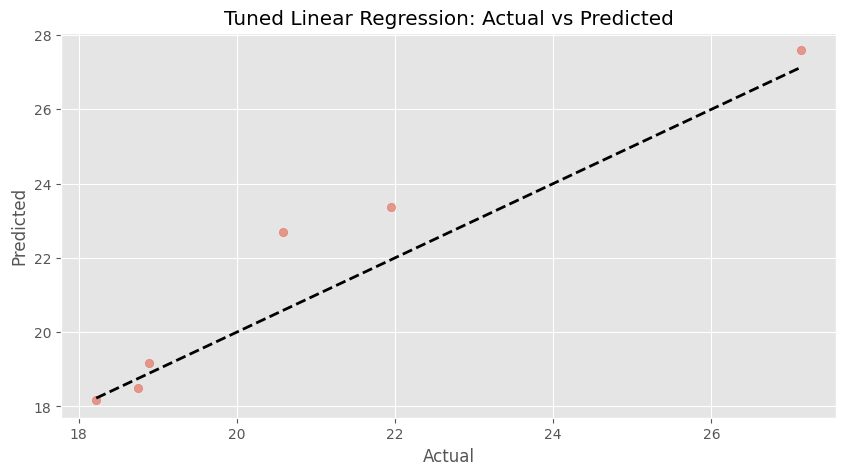


Feature Importance (Absolute Coefficient Values):
    Feature  Coefficient
11       11    -5.053290
14       14     2.982605
8         8     2.723254
13       13     2.439372
1         1    -2.062924
5         5     1.992497
16       16    -1.521218
2         2     1.457224
10       10     1.105770
3         3    -1.061139
7         7     0.959630
15       15     0.742594
6         6    -0.516159
0         0    -0.418423
4         4     0.330351
9         9    -0.075999
12       12     0.008215


In [ ]:
oil_lr_model = LinearRegression()
evaluate_model(oil_lr_model, oil_X_train_scaled, oil_y_train, oil_X_test_scaled, oil_y_test, "Baseline Linear Regression")

# Linear Regression with Polynomial Features
oil_poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=degree)),
    ('linear', LinearRegression())
])
evaluate_model(oil_poly_model, oil_X_train_scaled, oil_y_train, oil_X_test_scaled, oil_y_test, f"Polynomial (Degree {degree}) Linear Regression")

# Linear Regression with different parameters
param_grid = {
    'fit_intercept': [True, False],
    # 'normalize': [True, False]  # Deprecated in newer versions
}

best_score = -np.inf
best_params = {}

for fit_intercept in param_grid['fit_intercept']:
    oil_lr = LinearRegression(fit_intercept=fit_intercept)
    scores = cross_val_score(oil_lr, oil_X_train_scaled, oil_y_train, cv=5, scoring='r2')
    mean_score = np.mean(scores)
    print(f"fit_intercept={fit_intercept}: Mean CV R2 = {mean_score:.4f}")
    
    if mean_score > best_score:
        best_score = mean_score
        best_params = {'fit_intercept': fit_intercept}

print("\nBest parameters:", best_params)
oil_best_lr = LinearRegression(**best_params)
evaluate_model(oil_best_lr, oil_X_train_scaled, oil_y_train, oil_X_test_scaled, oil_y_test, "Tuned Linear Regression")

# Feature importance (coefficients)
if hasattr(oil_lr_model, 'coef_'):
    feature_importance = pd.DataFrame({
        'Feature': range(oil_X_train_scaled.shape[1]),  # Replace with actual feature names if available
        'Coefficient': oil_lr_model.coef_
    }).sort_values('Coefficient', key=abs, ascending=False)
    
    print("\nFeature Importance (Absolute Coefficient Values):")
    print(feature_importance)

*Support Vector Machine (Regression)*

In [ ]:
# Define parameter grid 
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],         # Kernel type
    'C': [0.1, 1, 10, 100],                      # Regularization strength
    'epsilon': [0.01, 0.1, 0.5, 1.0],            # Epsilon-tube width
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1] # Kernel coefficient
}

svm_model = SVR()

# Set up cross-validation (same as your RF setup)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Grid search with cross-validation
grid_search = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid,
    cv=kfold,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

# Fit the grid search
grid_search.fit(oil_X_train_scaled, oil_y_train)

# Get best model
best_svm = grid_search.best_estimator_

# Predict and evaluate
svm_preds = best_svm.predict(oil_X_test_scaled)

print("\nOptimized Support Vector Regression Results:")
print("Best Parameters:", grid_search.best_params_)
print("RMSE:", mean_squared_error(oil_y_test, svm_preds, squared=False))
print("MAE:", mean_absolute_error(oil_y_test, svm_preds))
print("R² Score:", r2_score(oil_y_test, svm_preds))


# Actual vs Predicted plot
plt.figure(figsize=(8, 6))
plt.scatter(oil_y_test, svm_preds, alpha=0.5, label='Predictions')
plt.plot([oil_y_test.min(), oil_y_test.max()], 
         [oil_y_test.min(), oil_y_test.max()], 'k--', label='Perfect Fit')
plt.xlabel('Actual Oil Values')
plt.ylabel('Predicted Oil Values')
plt.title('SVM: Actual vs Predicted Values')
plt.legend()
plt.show()

# --- Feature Coefficients (for linear kernel only) ---
if best_svm.kernel == 'linear':
    coef_df = pd.DataFrame({
        'Feature': oil_X_train.columns,
        'Coefficient': best_svm.coef_.flatten()
    }).sort_values('Coefficient', key=abs, ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(15))
    plt.title('Top 15 Feature Coefficients (Linear SVM)')
    plt.tight_layout()
    plt.show()

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_svm,
    oil_X_train_scaled,
    oil_y_train,
    cv=kfold,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training MSE")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Validation MSE")
plt.xlabel("Training Examples")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("SVM Learning Curve")
plt.show()

*Random Forest*

Fitting 5 folds for each of 648 candidates, totalling 3240 fits

Optimized Random Forest Regression:
Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
RMSE: 0.7229874775207062
MAE: 0.5029084849999995
R2 Score: 0.943860826017393


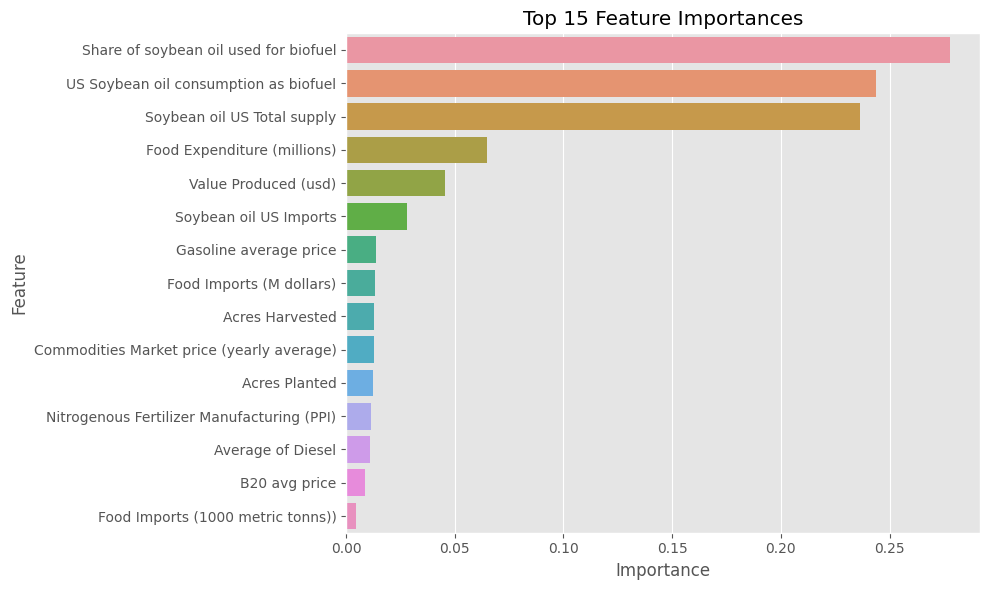

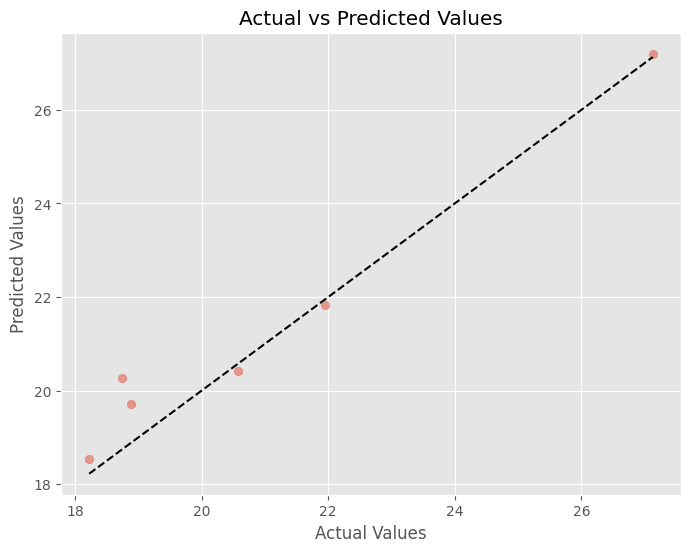

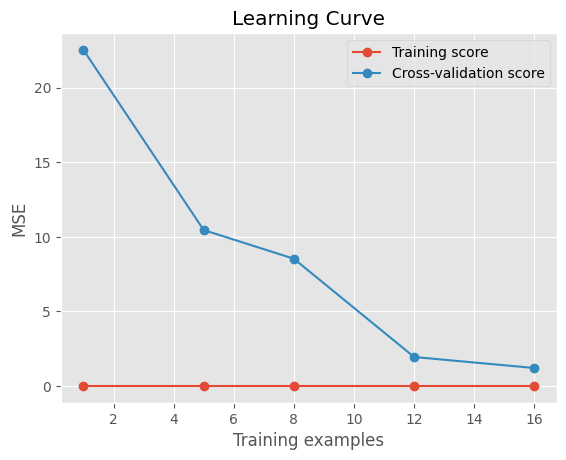

In [ ]:
# Define a parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 0.5],
    'bootstrap': [True, False]
}

# Create base model
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

# Set up cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, 
                          param_grid=param_grid, 
                          cv=kfold,
                          scoring='neg_mean_squared_error',
                          verbose=1,
                          n_jobs=-1)

# Fit the grid search
grid_search.fit(oil_X_train_scaled, oil_y_train)

# Get best model
best_rf = grid_search.best_estimator_

# Predict and evaluate
rf_preds = best_rf.predict(oil_X_test_scaled)

print("\nOptimized Random Forest Regression:")
print("Best Parameters:", grid_search.best_params_)
print("RMSE:", mean_squared_error(oil_y_test, rf_preds, squared=False))
print("MAE:", mean_absolute_error(oil_y_test, rf_preds))
print("R2 Score:", r2_score(oil_y_test, rf_preds))

# Feature importance analysis
feature_importances = best_rf.feature_importances_
features = oil_X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
plt.title('Top 15 Feature Importances')
plt.tight_layout()
plt.show()

# Actual vs Predicted plot
plt.figure(figsize=(8, 6))
plt.scatter(oil_y_test, rf_preds, alpha=0.5)
plt.plot([oil_y_test.min(), oil_y_test.max()], 
         [oil_y_test.min(), oil_y_test.max()], 'k--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_rf, oil_X_train_scaled, oil_y_train, cv=kfold, 
    scoring='neg_mean_squared_error', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5))

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("MSE")
plt.legend()
plt.title("Learning Curve")
plt.show()

*Bayesian Regression*

Fitting 5 folds for each of 1458 candidates, totalling 7290 fits

Optimized Bayesian Ridge Regression:
Best Parameters: {'alpha_1': 0.0001, 'alpha_2': 0.0001, 'compute_score': True, 'lambda_1': 1e-06, 'lambda_2': 0.0001, 'n_iter': 100, 'tol': 1e-05}
Cross-Validation RMSE: 0.9800 (±0.4941)
Test RMSE: 0.48725938108602285
Test MAE: 0.3874124235157854
Test R2 Score: 0.9745008979895102


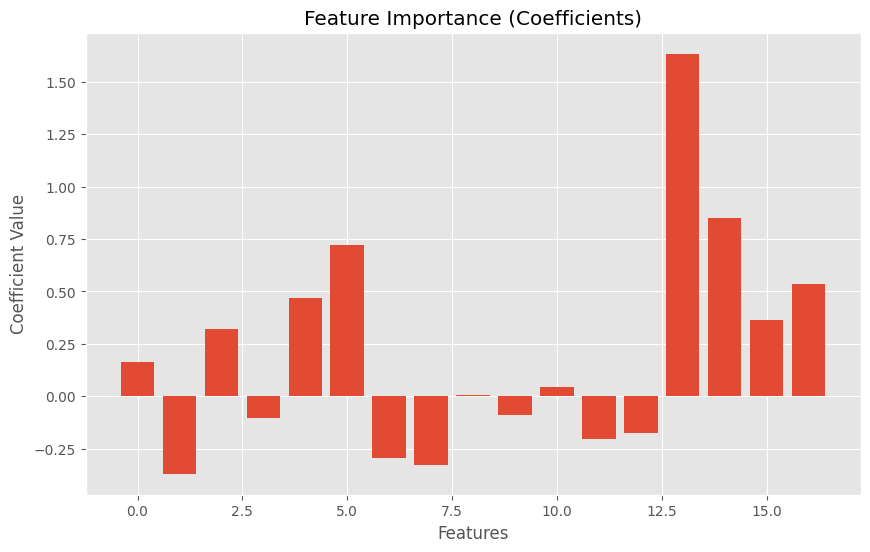

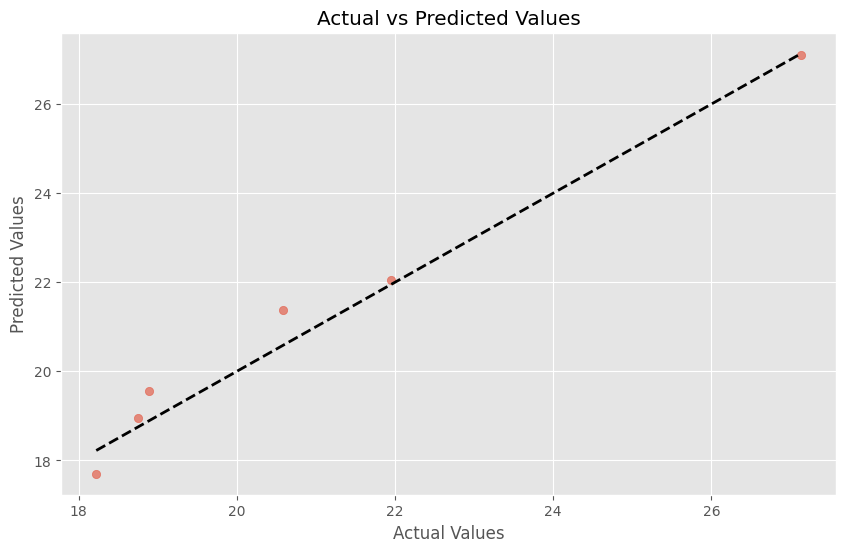

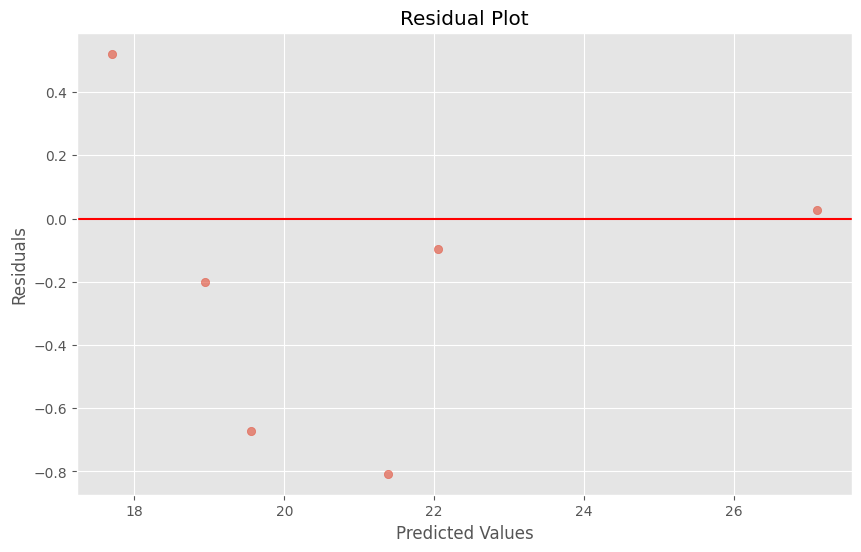

In [ ]:
# Define the parameter grid 
param_grid = {
    'n_iter': [100, 200, 300],
    'tol': [1e-3, 1e-4, 1e-5],
    'alpha_1': [1e-6, 1e-5, 1e-4],
    'alpha_2': [1e-6, 1e-5, 1e-4],
    'lambda_1': [1e-6, 1e-5, 1e-4],
    'lambda_2': [1e-6, 1e-5, 1e-4],
    'compute_score': [True, False]
}

# Initialize Bayesian Ridge model
bayes_model = BayesianRidge()

# Set up KFold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(bayes_model, param_grid, cv=kfold, 
                          scoring='neg_mean_squared_error',
                          n_jobs=-1, verbose=1)
grid_search.fit(oil_X_train_scaled, oil_y_train)

# Get the best model
best_bayes_model = grid_search.best_estimator_

# Cross-validation scores
cv_scores = cross_val_score(best_bayes_model, oil_X_train_scaled, oil_y_train, 
                           cv=kfold, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

# Predict and evaluate
bayes_preds = best_bayes_model.predict(oil_X_test_scaled)

print("\nOptimized Bayesian Ridge Regression:")
print("Best Parameters:", grid_search.best_params_)
print(f"Cross-Validation RMSE: {cv_rmse_scores.mean():.4f} (±{cv_rmse_scores.std():.4f})")
print("Test RMSE:", mean_squared_error(oil_y_test, bayes_preds, squared=False))
print("Test MAE:", mean_absolute_error(oil_y_test, bayes_preds))
print("Test R2 Score:", r2_score(oil_y_test, bayes_preds))

# Feature importance analysis
if hasattr(best_bayes_model, 'coef_'):
    feature_importance = best_bayes_model.coef_
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_importance)), feature_importance)
    plt.title("Feature Importance (Coefficients)")
    plt.xlabel("Features")
    plt.ylabel("Coefficient Value")
    plt.show()

# Actual vs Predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(oil_y_test, bayes_preds, alpha=0.6)
plt.plot([oil_y_test.min(), oil_y_test.max()], 
         [oil_y_test.min(), oil_y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

# Residual plot
residuals = oil_y_test - bayes_preds
plt.figure(figsize=(10, 6))
plt.scatter(bayes_preds, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

*K-Nearest Neighbour*

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best KNN Parameters:
{'metric': 'manhattan', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

Cross-validated R2 scores: [0.95819105 0.52815712 0.85356169 0.69530835 0.80478861]
Mean CV R2: 0.768 ± 0.147

Optimized K-Nearest Neighbors Regression:
RMSE: 0.9793020745163592
R2 Score: 0.8969998595528487


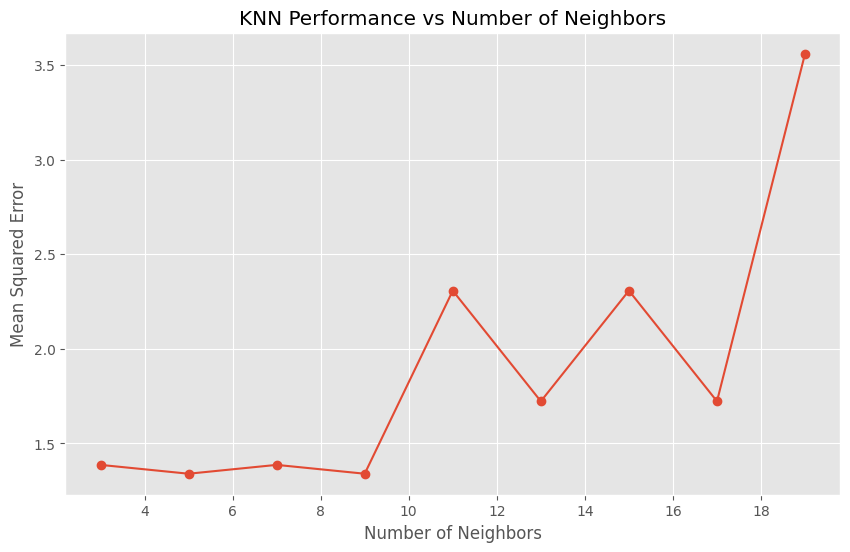

Food Expenditure (millions): 0.031 ± 0.015
Soybean oil US Total supply: 0.025 ± 0.008
US Soybean oil consumption as biofuel: 0.022 ± 0.007
Food Imports (1000 metric tonns)): 0.020 ± 0.014
Value Produced (usd): 0.020 ± 0.006
Acres Harvested: 0.019 ± 0.014
Acres Planted: 0.018 ± 0.009
Soybean oil US Imports: 0.010 ± 0.009
US Soybean oil consumption other than biofuel: 0.005 ± 0.002
Food Imports (M dollars): 0.003 ± 0.005
B20 avg price: 0.001 ± 0.012
Gasoline average price: 0.001 ± 0.013
Share of soybean oil used for biofuel: 0.001 ± 0.001
Average of Diesel: 0.000 ± 0.013
Nitrogenous Fertilizer Manufacturing (PPI): 0.000 ± 0.002
B99/B100 avg price: -0.001 ± 0.012
Commodities Market price (yearly average): -0.007 ± 0.016


In [ ]:
# Define parameter grid to search
param_grid = {
    'n_neighbors': range(3, 21, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]  # Power parameter for Minkowski metric
}

# Initialize and fit GridSearchCV
knn_grid = GridSearchCV(KNeighborsRegressor(), 
                        param_grid, 
                        cv=5,
                        scoring='neg_mean_squared_error',
                        n_jobs=-1,
                        verbose=1)
knn_grid.fit(oil_X_train_scaled, oil_y_train)

# Print best parameters
print("Best KNN Parameters:")
print(knn_grid.best_params_)

# Get best model
best_knn = knn_grid.best_estimator_

# Cross-validation evaluation
cv_scores = cross_val_score(best_knn, 
                           oil_X_train_scaled, 
                           oil_y_train, 
                           cv=5, 
                           scoring='r2')
print(f"\nCross-validated R2 scores: {cv_scores}")
print(f"Mean CV R2: {np.mean(cv_scores):.3f} ± {np.std(cv_scores):.3f}")

# Final evaluation on test set
knn_preds = best_knn.predict(oil_X_test_scaled)
print("\nOptimized K-Nearest Neighbors Regression:")
print("RMSE:", mean_squared_error(oil_y_test, knn_preds, squared=False))
print("R2 Score:", r2_score(oil_y_test, knn_preds))

# Visualize performance across different n_neighbors
results = knn_grid.cv_results_
neighbors = param_grid['n_neighbors']
mean_scores = [-results[f'split{i}_test_score'] for i in range(5)]
mean_scores = np.mean(mean_scores, axis=0)[:len(neighbors)]

plt.figure(figsize=(10, 6))
plt.plot(neighbors, mean_scores, 'o-')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Squared Error')
plt.title('KNN Performance vs Number of Neighbors')
plt.grid(True)
plt.show()

# Feature importance analysis (for KNN with distance weighting)
if best_knn.weights == 'distance':
    from sklearn.inspection import permutation_importance
    r = permutation_importance(best_knn, 
                              oil_X_test_scaled, 
                              oil_y_test,
                              n_repeats=10,
                              random_state=42)
    
    for i in r.importances_mean.argsort()[::-1]:
        print(f"{oil_X_train.columns[i]:<8}: "
              f"{r.importances_mean[i]:.3f} ± "
              f"{r.importances_std[i]:.3f}")

*Artificial Neural Networks*

In [ ]:
# Define the parameter grid to search
param_grid = {
    'hidden_layer_sizes': [(64, 32), (128, 64), (64, 32, 16), (128, 64, 32)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],  # L2 regularization parameter
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [1000, 1500, 2000],
    'early_stopping': [True, False],
    'batch_size': [32, 64, 128]
}

# Initialize the MLPRegressor
ann_model = MLPRegressor(random_state=42)

# Use GridSearchCV for exhaustive search (or RandomizedSearchCV for faster search)
search = GridSearchCV(
    ann_model,
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1,  # Use all available cores
    verbose=1
)

# Fit the model (this will take longer as it tests all combinations)
print("Starting grid search...")
search.fit(oil_X_train_scaled, oil_y_train)

# Get the best model
best_ann_model = search.best_estimator_

# Print best parameters
print("\nBest parameters found:")
print(search.best_params_)

# Predict and evaluate
ann_preds = best_ann_model.predict(oil_X_test_scaled)

print("\nArtificial Neural Network Regression:")
print("RMSE:", mean_squared_error(oil_y_test, ann_preds, squared=False))
print("MAE:", mean_absolute_error(oil_y_test, ann_preds))
print("R2 Score:", r2_score(oil_y_test, ann_preds))

# Optional: Print training scores for best model
print("\nTraining scores:") 
train_preds = best_ann_model.predict(oil_X_train_scaled)
print("Train RMSE:", mean_squared_error(oil_y_train, train_preds, squared=False))
print("Train R2 Score:", r2_score(oil_y_train, train_preds))

Starting grid search...
Fitting 5 folds for each of 2592 candidates, totalling 12960 fits

Best parameters found:
{'activation': 'relu', 'alpha': 0.01, 'batch_size': 32, 'early_stopping': True, 'hidden_layer_sizes': (128, 64), 'learning_rate': 'constant', 'max_iter': 1500, 'solver': 'lbfgs'}

Artificial Neural Network Regression:
RMSE: 0.5441150100189481
MAE: 0.44669152031118564
R2 Score: 0.9682030194638392

Training scores:
Train RMSE: 0.002799788441415886
Train R2 Score: 0.9999992172140522


___________________________________

**6) CONCLUSION**

For soybean harvesting, ensemble methods like Random Forest are recommended, whereas for biofuel production, a wider range of models, including Bayesian Regression and ANNs, can be highly effective. Future work could explore hybrid models or additional feature engineering to further improve performance. The insights gained from feature importance analyses also provide valuable insights for stakeholders in agriculture and biofuel production, helping them prioritize key factors in their decision-making processes. Overall, the findings emphasize the need for careful model selection and validation to address the unique challenges of each prediction task.